In [17]:
import pandas as pd
import numpy as np
from datetime import datetime

pd.set_option("display.max_rows",500)

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Preparation
- focus is to undertand final data structure
- support each step by visual analtics

In [18]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [19]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,944,955,955,955,963,963,977,981,989,989
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879


In [26]:
time_idx=pd_raw.columns[4:]
df_plot=pd.DataFrame({'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [21]:
#country_list = list(pd_raw['Country/Region'].unique())
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
              'India',
             ] 


In [22]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South",India
0,1/22/20,0,1,0,0,1,0
1,1/23/20,0,1,0,0,1,0
2,1/24/20,0,2,0,0,2,0
3,1/25/20,0,2,0,0,2,0
4,1/26/20,0,5,0,0,3,0


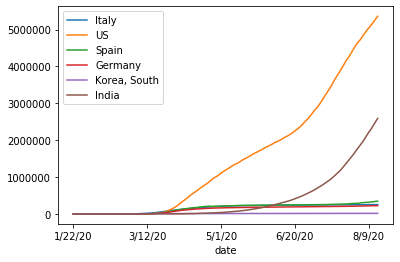

In [23]:
%matplotlib inline
df_plot.set_index('date').plot()

# Data Type

In [95]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South",India
0,1/22/20,0,1,0,0,1,0
1,1/23/20,0,1,0,0,1,0
2,1/24/20,0,2,0,0,2,0
3,1/25/20,0,2,0,0,2,0
4,1/26/20,0,5,0,0,3,0


In [96]:
time_idx=[datetime.strptime(each,"%m/%d/%y") for each in df_plot.date]
time_str=[each.strftime('%y-%m-%d') for each in time_idx] 

In [97]:
df_plot.date=time_idx
type(df_plot.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [98]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South",India
0,2020-01-22,0,1,0,0,1,0
1,2020-01-23,0,1,0,0,1,0
2,2020-01-24,0,2,0,0,2,0
3,2020-01-25,0,2,0,0,2,0
4,2020-01-26,0,5,0,0,3,0


In [99]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

# Relational data model - defining a primary key

In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (source: wiki)


A primary key’s main features are:

- It must contain a unique value for each row of data.
- It cannot contain null values.

In [144]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,18712,19195,19689,20216,20770,21355,21948,22549,23084,23691
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,855,855,858,861,862,877,880,880,880,884
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,462,506,525,541,576,607,638,687,705,749


In [145]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country','Province/State':'state'})
pd_data_base=pd_data_base.drop(columns={'Lat','Long'})
test_pd=pd_data_base.set_index(['state','country']).T
test_pd

state           NaN                                                     \
country Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda   
1/22/20           0       0       0       0      0                   0   
1/23/20           0       0       0       0      0                   0   
1/24/20           0       0       0       0      0                   0   
1/25/20           0       0       0       0      0                   0   
1/26/20           0       0       0       0      0                   0   
1/27/20           0       0       0       0      0                   0   
1/28/20           0       0       0       0      0                   0   
1/29/20           0       0       0       0      0                   0   
1/30/20           0       0       0       0      0                   0   
1/31/20           0       0       0       0      0                   0   
2/1/20            0       0       0       0      0                   0   
2/2/20            0       0       0       0      0                   0   
2/3/20            0       0       0       0      0                   0   
2/4/20            0       0       0       0      0                   0   
2/5/20            0       0       0       0      0                   0   
2/6/20            0       0       0       0      0                   0   
2/7/20            0       0       0       0      0                   0   
2/8/20            0       0       0       0      0                   0   
2/9/20            0       0       0       0      0                   0   
2/10/20           0       0       0       0      0                   0   
2/11/20           0       0       0       0      0                   0   
2/12/20           0       0       0       0      0                   0   
2/13/20           0       0       0       0      0                   0   
2/14/20           0       0       0       0      0                   0   
2/15/20           0       0       0       0      0                   0   
2/16/20           0       0       0       0      0                   0   
2/17/20           0       0       0       0      0                   0   
2/18/20           0       0       0       0      0                   0   
2/19/20           0       0       0       0      0                   0   
2/20/20           0       0       0       0      0                   0   
2/21/20           0       0       0       0      0                   0   
2/22/20           0       0       0       0      0                   0   
2/23/20           0       0       0       0      0                   0   
2/24/20           1       0       0       0      0                   0   
2/25/20           1       0       1       0      0                   0   
2/26/20           1       0       1       0      0                   0   
2/27/20           1       0       1       0      0                   0   
2/28/20           1       0       1       0      0                   0   
2/29/20           1       0       1       0      0                   0   
3/1/20            1       0       1       0      0                   0   
3/2/20            1       0       3       1      0                   0   
3/3/20            1       0       5       1      0                   0   
3/4/20            1       0      12       1      0                   0   
3/5/20            1       0      12       1      0                   0   
3/6/20            1       0      17       1      0                   0   
3/7/20            1       0      17       1      0                   0   
3/8/20            4       0      19       1      0                   0   
3/9/20            4       2      20       1      0                   0   
3/10/20           5      10      20       1      0                   0   
3/11/20           7      12      20       1      0                   0   
3/12/20           7      23      24       1      0                   0   
3/13/20           7      33      26       1      0                   1   
3/14

In [142]:
test_pd=test_pd.stack(level=[0,1]).reset_index()
pd_relational_model=test_pd.rename(columns={'level_0':'date', 0:'confirmed'})

In [146]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [151]:
pd_relational_model.date=pd_relational_model.date.astype('datetime64[ns]')
pd_relational_model

,date,state,country,confirmed
0,2020-01-22,NaN,Afghanistan,0.0
1,2020-01-22,NaN,Albania,0.0
2,2020-01-22,NaN,Algeria,0.0
3,2020-01-22,NaN,Andorra,0.0
4,2020-01-22,NaN,Angola,0.0
...,...,...,...,...
81807,2020-07-20,Zhejiang,West Bank and Gaza,8916.0
81808,2020-07-20,Zhejiang,Western Sahara,10.0
81809,2020-07-20,Zhejiang,Yemen,1619.0
81810,2020-07-20,Zhejiang,Zambia,3326.0


In [152]:
pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)